# Data Analytic Project

# 1. How to solve a Data Analytics Use Case?


1. Domain Understanding, Business Problem Understanding and research
2. Data Exploration
    - Understanding data, identifying few doubts, indentify erros/issues with data
3. Data Cleaning
    - Handle missing values
    - Handle duplicated rows
    - Remove unwanted columns
    - Remove/handle un natural values
4. Exploratory Analysis

    - Use Data visualization to answer the business problem
        - Univariate Analysis - visualize one feature individually to understand it
        - Bivariate Analysis - understand impact of feature on target/label
        - Multivariate Analysis - undertand impact of mutliple features altogether on the target/label
    - Use statistics to answer business problem
5. Create Report / comment your findings, support them with real world logic


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:\dickys task\Happy Work\BootUP\data1\Bank_churn_modelling.csv')
df.shape

(10000, 14)

# 2. DATA EXPLORATION

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Note: Columns - RowNumber, CustomerId, Surname can not have any information to answer Why Customers Exited, as these columns are just identifiers of the customers.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Note: bcs the geography and gender are object, they may have the missing value as '?', '.', or something else eventhough they have nol-null

In [6]:
#Check unique values in geography and gender

print(df.Geography.unique())
print(df.Gender.unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [7]:
#statistical exploration
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Note:
    1. MOre than 25% of customers have 0 balance in their account as minimum balamce reported.

# 3. DATA CLEANING

In [8]:
#check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#check for duplicated rows
df.duplicated().sum()

0

In [10]:
#remove unwanted columns
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
#removing un natural values - we don't have un natural values

In [14]:
percentages = []
for ex in df["Exited"].unique():
    p = round((df['Gender'][df["Exited"]==ex].value_counts()['Female']/df["Exited"][df['Gender']=='Female'].value_counts().sum())*100, 2) 
    percentages.append(p)
    print(ex, ":" , p)


1 : 25.07
0 : 74.93


In [15]:
f =df['Gender'][df['Exited']==1].value_counts()['Female']   
g =df['Exited'][df['Gender']=='Female'].value_counts().sum()
h= round((f/g)*100, 2)
print(f)
print(g)
print(h)

1139
4543
25.07


In [16]:
f.shape

()

In [17]:
percentages = []
for gen in df["Gender"].unique():
    
    p = round((df["Exited"][df["Gender"]==gen].value_counts()[1]/df["Exited"][df["Gender"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)
    
for gen in df["Gender"].unique():
    
    p = round((df["Exited"][df["Gender"]==gen].value_counts()[0]/df["Exited"][df["Gender"]==gen].value_counts().sum())*100 , 2)
    
    print(gen,"(% to stay) : ", p)

Female (% to exit) :  25.07
Male (% to exit) :  16.46
Female (% to stay) :  74.93
Male (% to stay) :  83.54


In [18]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# 4. EXPLORATORY ANALYTICS

### Univariate Analysis

    - analysing one column at a time, not looking at inference with respect to label
    
for numeric - scatter plot.

for categorical - countplot.

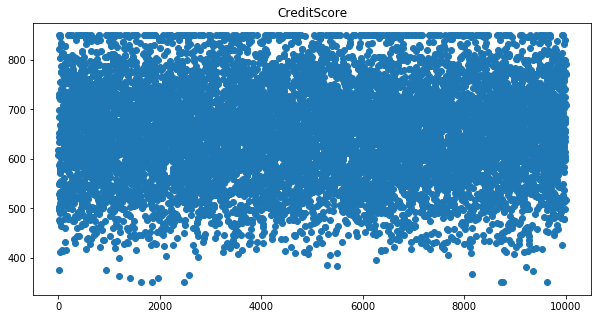

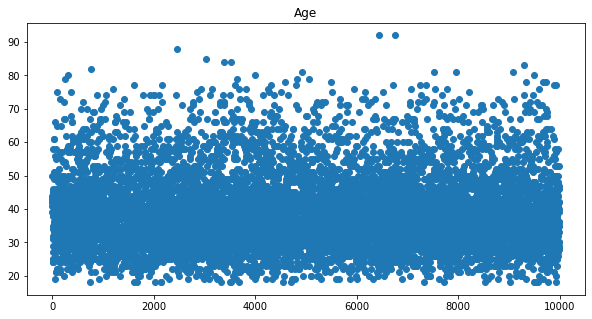

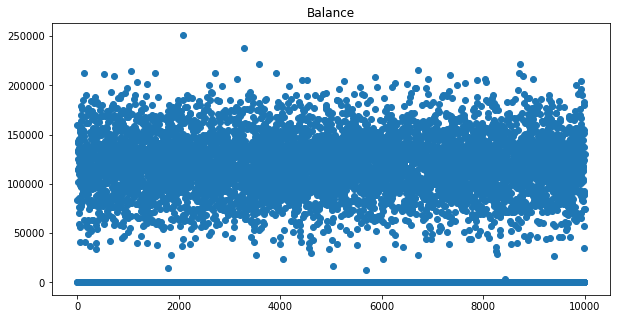

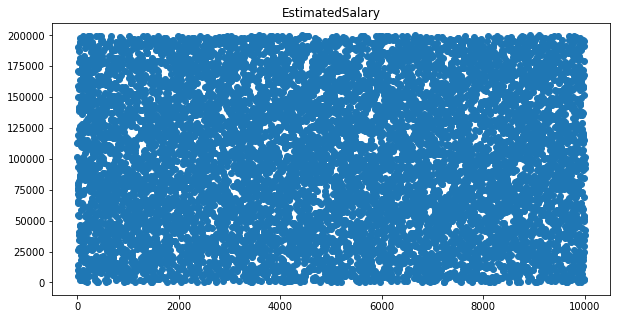

In [19]:
#CreditScore, Age, Balance

for col in ['CreditScore','Age','Balance','EstimatedSalary']:
    plt.figure(figsize=(10,5))
    plt.scatter(np.arange(10000), df[col])
    plt.title(col)
    plt.show()

Note:
    - in case of balance, there are 2 groups. one has 0 balance, another one has more than 50000 balance
    - majority of cust have age between 20 - 50

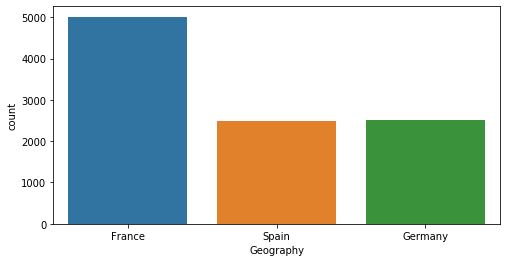

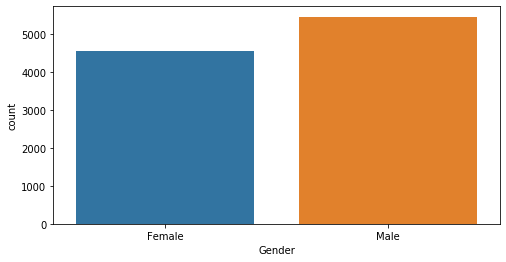

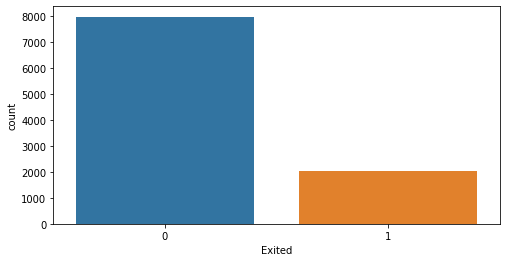

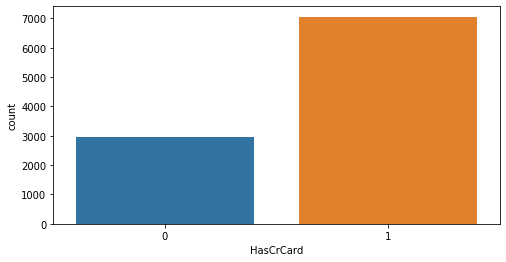

In [20]:
#Countplot for categorical

for col in ['Geography','Gender',"Exited",'HasCrCard']:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

Note:
1. almost 50% of customers are from France, rest 25% approx from each Germany and Spain
2. mojority of customers are Male and aroudn 4500 are female
3. 20% of customers left the bank
4. 30% of customers do not have credit card

### Bivariate Analysis



In [1]:
#numerical vs categorical - probability density distribution - distplot
#creditscore vs exited

for col in ['CreditScore','Age','Balance','EstimatedSalary']:
    plt.figure(figsize=(12,5))
    sns.distplot(df[col][df.Exited==0])
    sns.distplot(df[col][df.Exited==1])
    plt.legend(['0','1'])
    plt.show()

NameError: name 'plt' is not defined

Note:
    
1. for creditscore are almost overlapping 
   each other, that means at evey value of creditscore the probability of customer leaving and not leaving is almost 
   same, credit score may not have any information to predict, which cusomter will leave

2. for age there is possibility of the young age (20<age<40) to not leaving, while the old age (>40) is possible to leave


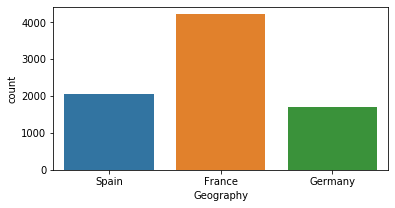

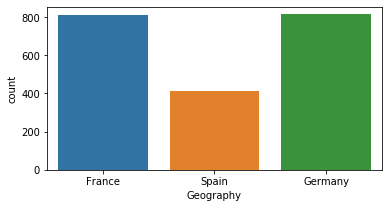

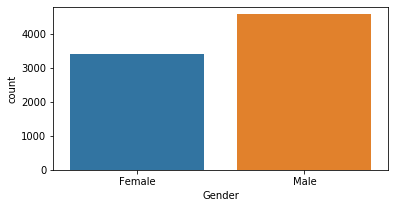

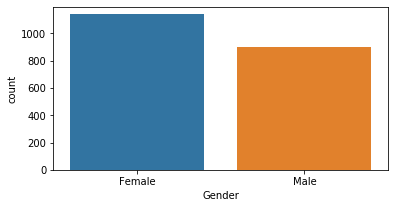

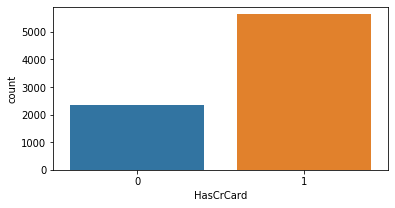

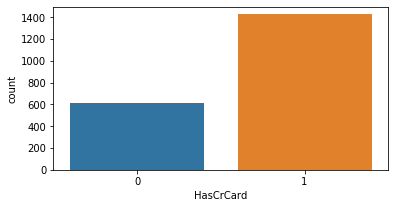

In [22]:
#categorical vs categorical - countplot

for col in ['Geography','Gender','HasCrCard']:
    plt.figure(figsize=(6,3))
    sns.countplot(df[col][df.Exited==0])
    plt.show()
    plt.figure(figsize=(6,3))
    sns.countplot(df[col][df.Exited==1])
    plt.show()

In [23]:
for col in ['Geography','Gender','HasCrCard']:
    out = pd.crosstab(df[col],df['Exited'], margins=True)
    print(out)

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000


### Multivariate Analysis

In [24]:
# num vs num vs categ - scatterplot (seaborn)

# Age, CreditScore, Exited

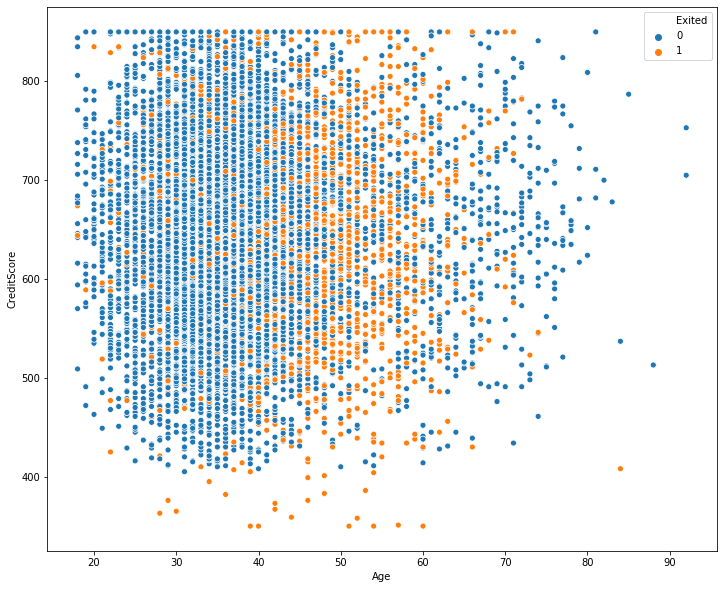

In [25]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Age', y='CreditScore',hue='Exited',data=df)
plt.show()

Note:

    - customers having creditscore<400 are leaving
    - customers between age 40-65 are leaving, for customers age<40 and age>65 are mostly not leaving

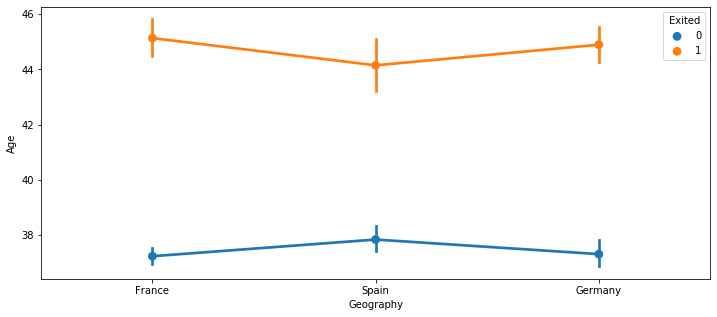

In [26]:
# num vs categ vs categ - pointplot
# Age, geo, Exited || x=geo, y=age, hue=exited

plt.figure(figsize=(12,5))
sns.pointplot(x='Geography', y='Age',hue='Exited',data=df)
plt.show()

Note:
    
        Old age customers are leaving the bank, that pattern exist in all the three countries

- statistics for exploratory analytics

### Corelation Analysis

cor>0.5 - V good, positive >> x increases .. y increases
cor>0.1 and cor<0.5 - good, positive >> x increases .. y increases

cor<-0.5 - V good, negative >> x increases .. y decrease
cor>-0.5 and cor<-0.1 - good, negative >> x increases .. y decrease

cor is between -0.1 to +0.1 >> bad correlation

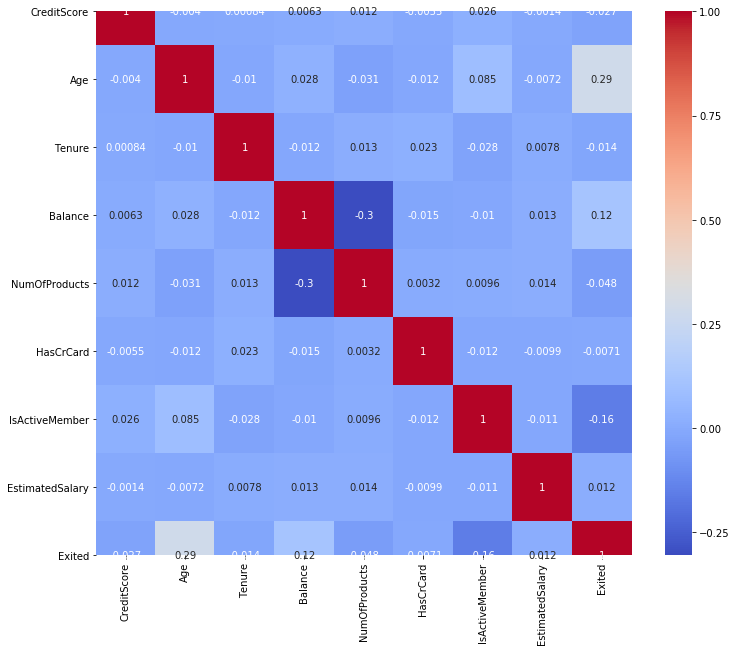

In [27]:
# calculate correlation

cor = df.corr() # to get the correlation matrix

# to visualize the correlation matrix we will use heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

Note:

    - Age, and Balance have positive correlation with Exited
    - Is Active Member has negative correlation with Exited
    - Num of products may have some nonlinear relation with Exited